In [44]:
# import the required libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pickle 

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [46]:
df=pd.read_csv('Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [48]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [49]:
# droping all the unwanted columns
df=df.drop(['area_type','availability','society','balcony'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [50]:
# Handaling Misssing Values in location column
df['location'].value_counts() # as whitefield is repeated for more time,we fill it with the same value
df['location']=df['location'].fillna('Whitefield')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [51]:
# Handeling missing values in size coilumn
df['size'].value_counts() #as 2bhk repeated more time we fill it with same 
df['size']=df['size'].fillna('2 BHK')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [52]:
# handeling missing value in bath column
df['bath']=df['bath'].fillna(df['bath'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [53]:
df.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [54]:
# cleaning size column 
df['size'].unique()
out=[i.split()[0] for i in df['size']]
df['bhk']=out
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
 5   bhk         13320 non-null  object 
dtypes: float64(2), object(4)
memory usage: 624.5+ KB


In [56]:
df['bhk']=df['bhk'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
 5   bhk         13320 non-null  int32  
dtypes: float64(2), int32(1), object(3)
memory usage: 572.5+ KB


In [57]:
df['total_sqft'].unique()
def convert(a):
    l=a.split('-')
    if len(l)==2:
        return (float(l[0])+float(l[1]))//2
    try:
        return float(a)
    except:
        return None
df['total_sqft']=df['total_sqft'].apply(convert)
df['total_sqft']=df['total_sqft'].fillna(df['total_sqft'].median())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13320 non-null  object 
 1   size        13320 non-null  object 
 2   total_sqft  13320 non-null  float64
 3   bath        13320 non-null  float64
 4   price       13320 non-null  float64
 5   bhk         13320 non-null  int32  
dtypes: float64(3), int32(1), object(2)
memory usage: 572.5+ KB


In [58]:
df['price_per_sqft']=df['price']*100000/df['total_sqft']
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13320, dtype: float64

In [59]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000


In [60]:
# Cleaning location col 
df['location']=df['location'].apply(lambda x:x.strip())
df['location'].value_counts()

location
Whitefield                        542
Sarjapur  Road                    399
Electronic City                   304
Kanakpura Road                    273
Thanisandra                       237
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1294, dtype: int64

In [61]:
location_count=df['location'].value_counts()
loc_less_than_10=location_count[location_count<=10]
loc_less_than_10

location
Dairy Circle                      10
Nagappa Reddy Layout              10
Basapura                          10
1st Block Koramangala             10
Sector 1 HSR Layout               10
                                  ..
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
singapura paradise                 1
Abshot Layout                      1
Name: count, Length: 1053, dtype: int64

In [62]:
df['location']=df['location'].apply(lambda x:'Other' if x in loc_less_than_10 else x)
df['location'].value_counts()

location
Other                 2885
Whitefield             542
Sarjapur  Road         399
Electronic City        304
Kanakpura Road         273
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: count, Length: 242, dtype: int64

In [63]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13320.000000,13320.000000,13320.000000,13320.000000,1.332000e+04
mean,1558.643930,2.688814,112.565627,2.802778,7.919415e+03
std,1236.376078,1.338754,148.971674,1.294496,1.062471e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266667e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.440000e+03
75%,1678.000000,3.000000,120.000000,3.000000,7.328359e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [64]:
df=df[(df['total_sqft']/df['bhk'])>=300]
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12568.000000,12568.000000,12568.000000,12568.000000,12568.000000
mean,1593.597880,2.559039,111.409518,2.650064,6313.449450
std,1259.483709,1.077715,151.916676,0.976813,4174.850584
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1117.750000,2.000000,49.000000,2.000000,4209.344773
50%,1300.000000,2.000000,70.000000,3.000000,5295.544522
75%,1700.000000,3.000000,115.000000,3.000000,6927.325006
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [65]:
#handling outliers in total_sqft
df=df[df['total_sqft']>=df['bhk']*300]
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12568.000000,12568.000000,12568.000000,12568.000000,12568.000000
mean,1593.597880,2.559039,111.409518,2.650064,6313.449450
std,1259.483709,1.077715,151.916676,0.976813,4174.850584
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1117.750000,2.000000,49.000000,2.000000,4209.344773
50%,1300.000000,2.000000,70.000000,3.000000,5295.544522
75%,1700.000000,3.000000,115.000000,3.000000,6927.325006
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


<Axes: ylabel='bath'>

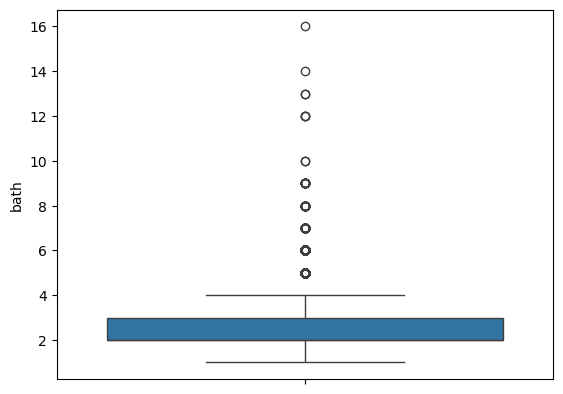

In [66]:
sns.boxplot(y='bath',data=df)

<Axes: ylabel='bath'>

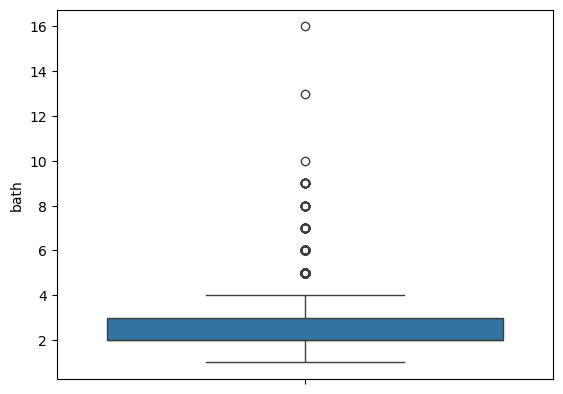

In [67]:
df=df[df['bath']<=df['bhk']]
sns.boxplot(y='bath',data=df)

<Axes: ylabel='bhk'>

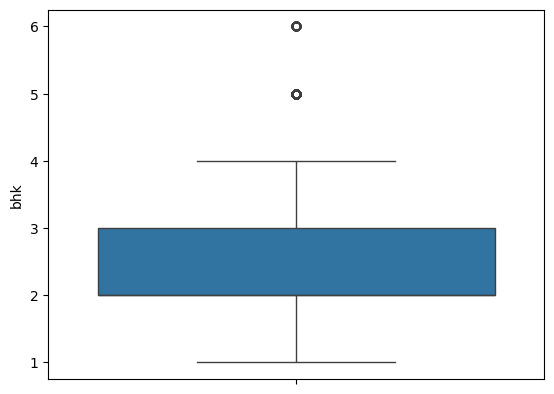

In [68]:
#handling outliers in bhk
df=df[df['bhk']<=6]
sns.boxplot(y='bhk',data=df)

<Axes: ylabel='price_per_sqft'>

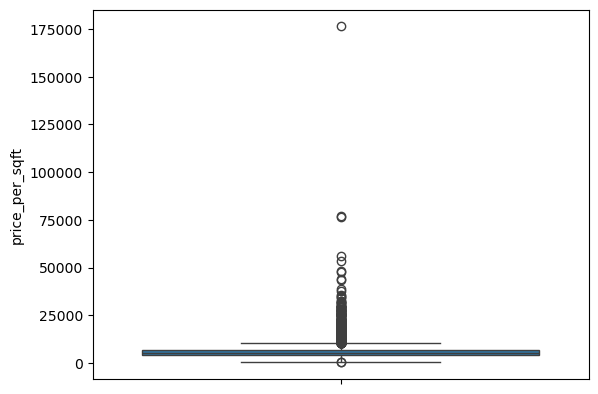

In [69]:
#handling outliers in price_per_sqft
sns.boxplot(y='price_per_sqft',data=df)

<Axes: ylabel='price_per_sqft'>

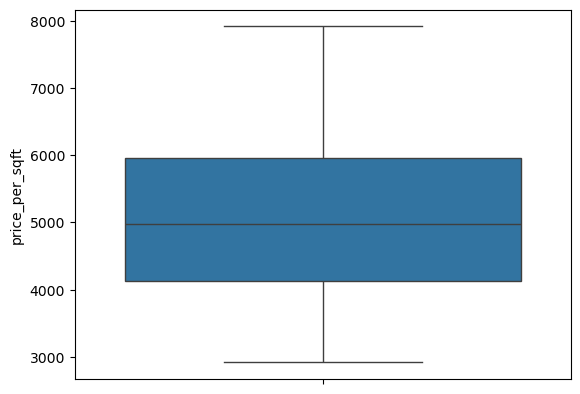

In [70]:
#handling outliers in price_per_sqr
q1=df['price_per_sqft'].quantile(0.25)
q3=df['price_per_sqft'].quantile(0.75)
IQR=q3-q1
low_boun=q1-0.5*IQR
up_boun=q3+0.5*IQR
df=df[(df['price_per_sqft']>=low_boun)&(df['price_per_sqft']<=up_boun)]
sns.boxplot(y='price_per_sqft',data=df)

In [71]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248


In [72]:
df.drop(['size','price_per_sqft'],axis=1)
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248


In [73]:
copied_dataset=df.copy()
from sklearn.preprocessing import LabelEncoder
obj=LabelEncoder()
df['location']=obj.fit_transform(df['location'])
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,78,2 BHK,1056.0,2.0,39.07,2,3699.810606
2,226,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,158,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,150,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,235,2 BHK,1170.0,2.0,38.00,2,3247.863248


In [74]:
copied_dataset

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
...,...,...,...,...,...,...,...
13313,Uttarahalli,3 BHK,1345.0,2.0,57.00,3,4237.918216
13314,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,6530.612245
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136


In [75]:
df['bhk'].value_counts()

bhk
2    4870
3    3661
1     450
4     429
5      72
6      40
Name: count, dtype: int64

In [76]:
df = df.drop(['size','price_per_sqft'],axis=1)
X=df.drop('price',axis=1)
y=df['price']

In [77]:
from sklearn.model_selection import train_test_split,GridSearchCV
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.3,random_state=42)
model=RandomForestRegressor(random_state=42)
params={
"n_estimators":[100,150,200,250,300],
"max_depth":[3,4,5,6]
}

In [78]:
grid=GridSearchCV(estimator=model,param_grid=params,cv=5)
grid.fit(Xtrain,ytrain)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [100, 150, 200, 250, 300]})

In [81]:
print('training efficiency:',grid.score(Xtrain,ytrain))
print('testing efficiency:',grid.score(Xtest,ytest))

training efficiency: 0.8673386903968285
testing efficiency: 0.8231160621755518


In [83]:
import pickle
with open('model.pkl','wb') as file:
    pickle.dump(grid,file)

In [84]:
copied_dataset.to_csv('copied.csv')

In [85]:
import sklearn
sklearn.__version__

'1.5.1'